In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [170]:
data = pd.read_csv("1. Regression - Module - (Housing Prices).csv")
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [174]:
required_columns = ['Sale Price','No of Bedrooms','No of Bathrooms','Flat Area (in Sqft)']
data = data[required_columns]
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft)
0,221900.0,3,1.00,1180.0
1,538000.0,3,2.25,2570.0
2,180000.0,2,1.00,770.0
3,604000.0,4,3.00,1960.0
4,510000.0,3,2.00,1680.0


In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sale Price           21609 non-null  float64
 1   No of Bedrooms       21613 non-null  int64  
 2   No of Bathrooms      21609 non-null  float64
 3   Flat Area (in Sqft)  21604 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 675.5 KB


In [178]:
#Drop Null values
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21596 entries, 0 to 21612
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sale Price           21596 non-null  float64
 1   No of Bedrooms       21596 non-null  int64  
 2   No of Bathrooms      21596 non-null  float64
 3   Flat Area (in Sqft)  21596 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 843.6 KB


In [180]:
column_names = {'Sale Price' : 'Sale_Price','No of Bedrooms':'No_of_Bedrooms',
                'No of Bathrooms':'No_of_Bathrooms','Flat Area (in Sqft)':'Flat_Area'}
data = data.rename(columns = column_names)
data.columns

Index(['Sale_Price', 'No_of_Bedrooms', 'No_of_Bathrooms', 'Flat_Area'], dtype='object')

In [182]:
#Treating Sale Price outlier values
q1 = data['Sale_Price'].quantile(0.25)
q3 = data['Sale_Price'].quantile(0.75)
IQR = q3 - q1
lowerlimit = q1 - 1.5*IQR
upperlimit = q3 + 1.5*IQR
lowerlimit,upperlimit

(-162906.25, 1129743.75)

In [184]:
def limit_imputer(value):
    if value>upperlimit:
        return upperlimit
    if value<lowerlimit:
        return lowerlimit
    else:
        return value

data['Sale_Price'] = data['Sale_Price'].apply(limit_imputer)

In [186]:
data['mean_sale_price'] = data['Sale_Price'].mean()
data['mean_sale_price']

0        511639.00742
1        511639.00742
2        511639.00742
3        511639.00742
4        511639.00742
             ...     
21608    511639.00742
21609    511639.00742
21610    511639.00742
21611    511639.00742
21612    511639.00742
Name: mean_sale_price, Length: 21596, dtype: float64

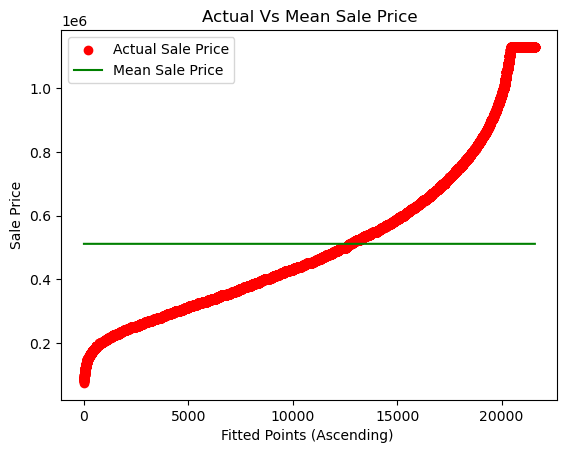

In [188]:
plt.figure(dpi = 100)
k = range(0,len(data))
plt.scatter(k,data["Sale_Price"].sort_values(),color = 'red',label = "Actual Sale Price")
plt.plot(k,data['mean_sale_price'],color="green",label = "Mean Sale Price")
plt.xlabel("Fitted Points (Ascending) ")
plt.ylabel("Sale Price")
plt.title("Actual Vs Mean Sale Price")
plt.legend()

In [189]:
mean_sales_difference = data['mean_sale_price'] - data['Sale_Price']

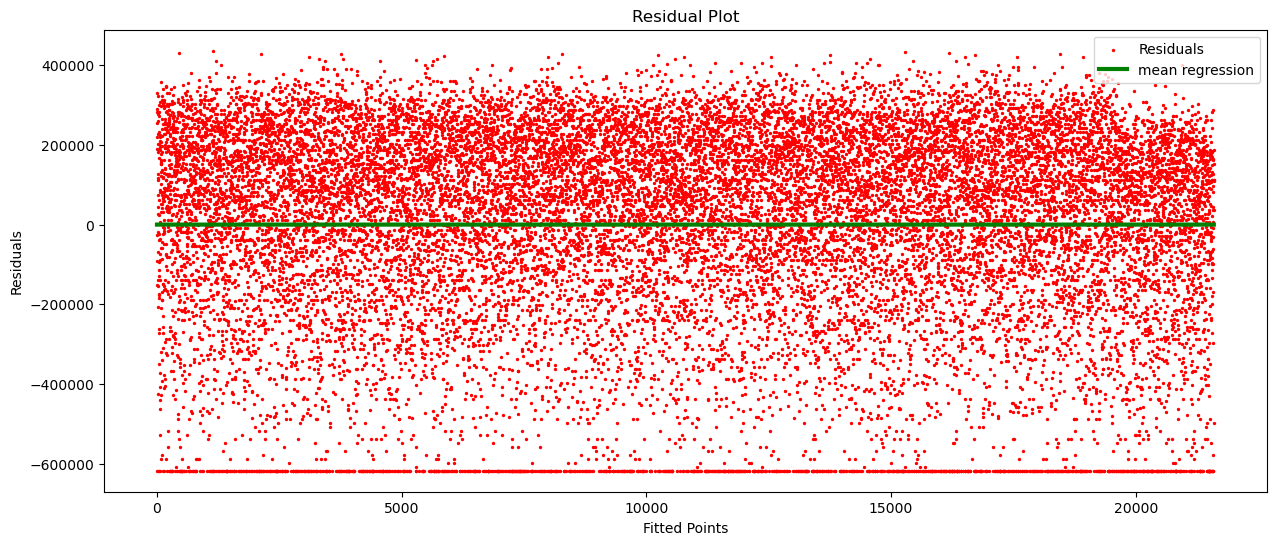

In [192]:
#Residual plot
k = range(0,len(data))
i = [0 for i in range (0,len(data))]
plt.figure(figsize = (15,6))

plt.scatter(k,mean_sales_difference,color='red',label='Residuals',s=2)
plt.plot(k,i,color='green',label = 'mean regression',linewidth=3)
plt.title('Residual Plot')
plt.xlabel('Fitted Points')
plt.ylabel('Residuals')
plt.legend()

<function matplotlib.pyplot.show(close=None, block=None)>

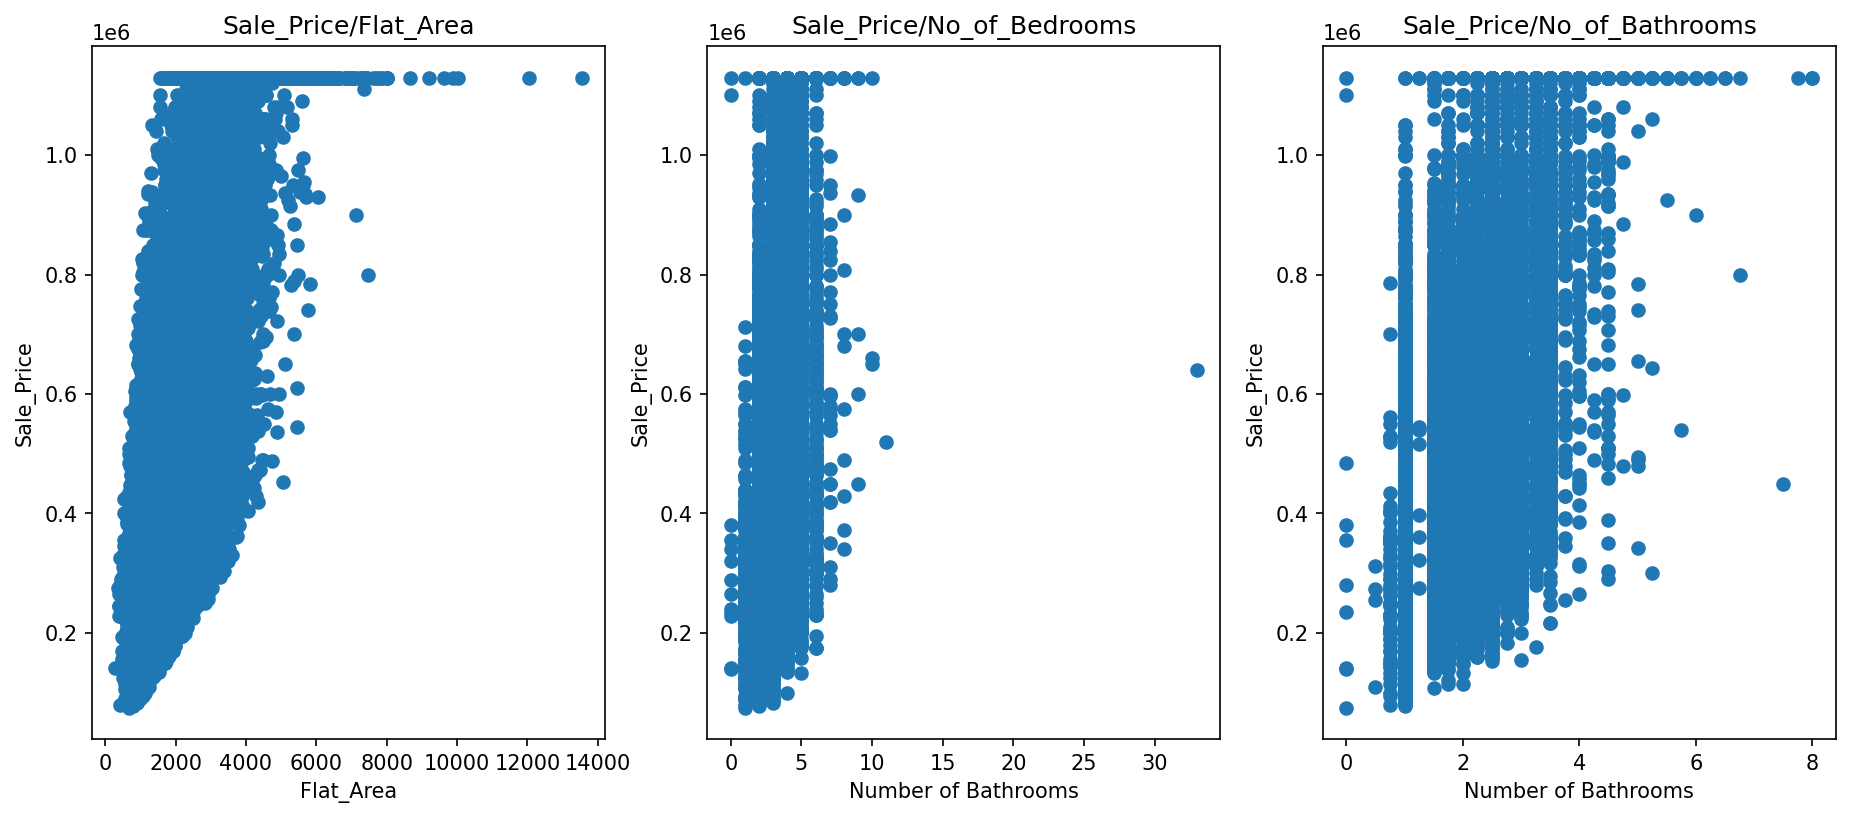

In [193]:
plt.figure(figsize = (15,6) ,dpi=150)
plt.subplot(1,3,1)
plt.scatter(data.Flat_Area,data.Sale_Price)
plt.xlabel("Flat_Area")
plt.ylabel("Sale_Price")
plt.title("Sale_Price/Flat_Area")

plt.subplot(1,3,2)
plt.scatter(data.No_of_Bedrooms,data.Sale_Price)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Sale_Price")
plt.title("Sale_Price/No_of_Bedrooms")

plt.subplot(1,3,3)
plt.scatter(data.No_of_Bathrooms,data.Sale_Price)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Sale_Price")
plt.title("Sale_Price/No_of_Bathrooms")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

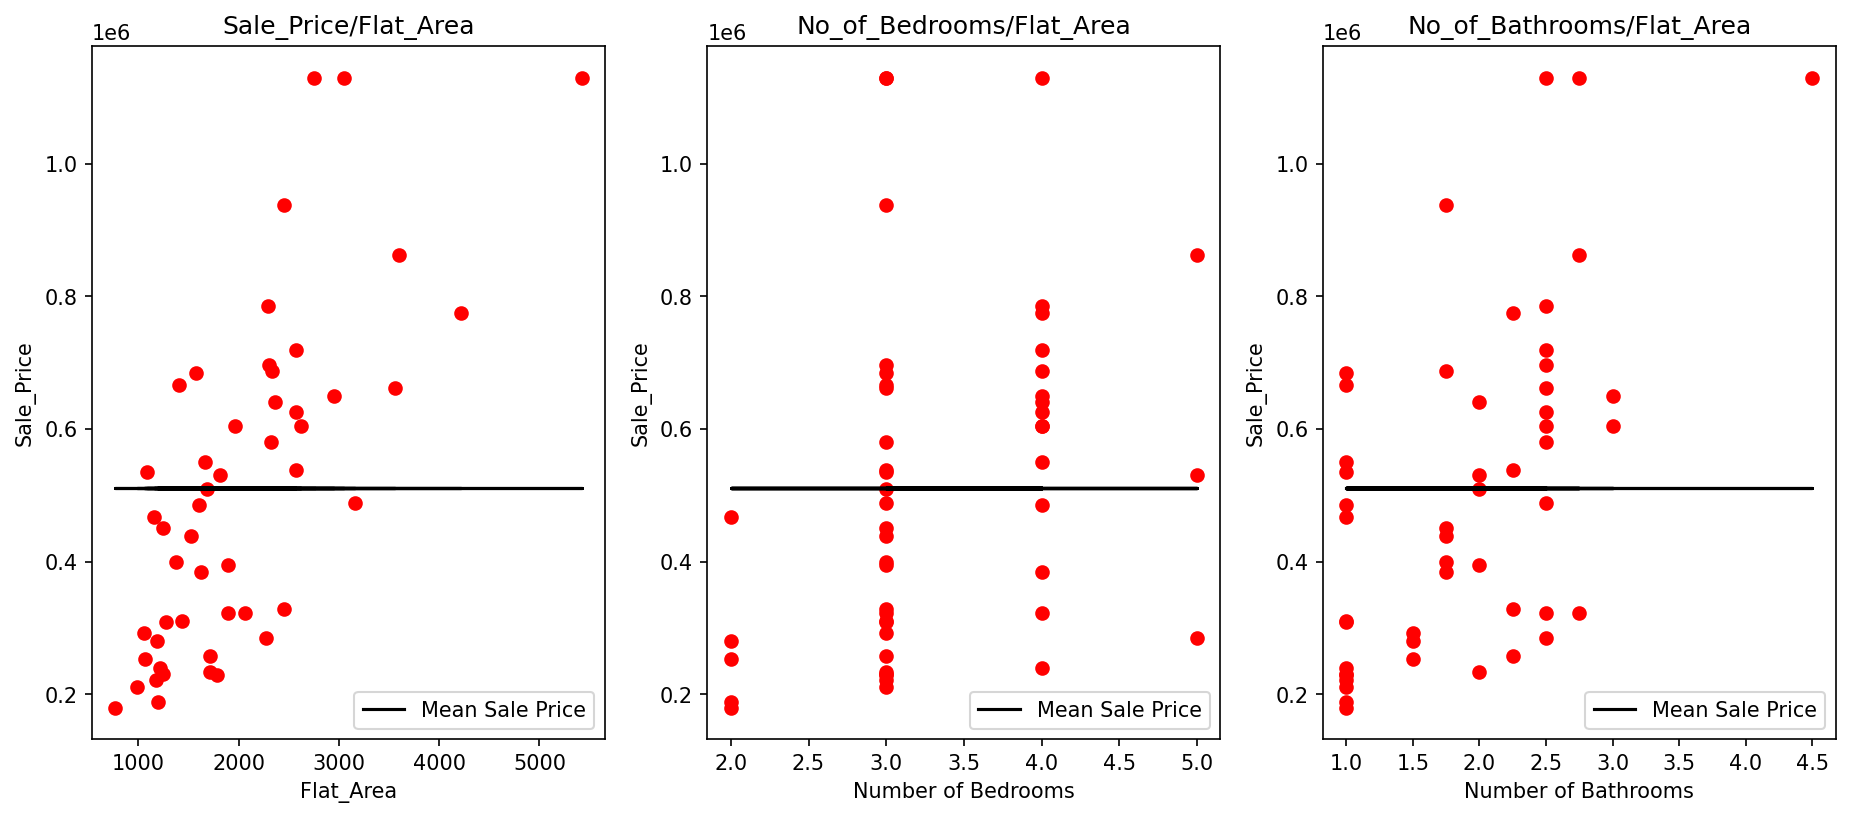

In [194]:
data['mean_sale_price'] = data.Sale_Price.mean()
new_data = data.head(50)
plt.figure(figsize = (15,6) ,dpi=150)

plt.subplot(1,3,1)
plt.scatter(new_data.Flat_Area,new_data.Sale_Price,color='red')
plt.plot(new_data.Flat_Area,new_data.mean_sale_price,color='black',label = 'Mean Sale Price')
plt.xlabel("Flat_Area")
plt.ylabel("Sale_Price")
plt.title("Sale_Price/Flat_Area")
plt.legend()

plt.subplot(1,3,2)
plt.scatter(new_data.No_of_Bedrooms,new_data.Sale_Price,color='red')
plt.plot(new_data.No_of_Bedrooms,new_data.mean_sale_price,color='black',label = 'Mean Sale Price')
plt.xlabel("Number of Bedrooms")
plt.ylabel("Sale_Price")
plt.title("No_of_Bedrooms/Flat_Area")
plt.legend()

plt.subplot(1,3,3)
plt.scatter(new_data.No_of_Bathrooms,new_data.Sale_Price,color='red')
plt.plot(new_data.No_of_Bathrooms,new_data.mean_sale_price,color='black',label = 'Mean Sale Price')
plt.xlabel("Number of Bathrooms")
plt.ylabel("Sale_Price")
plt.title("No_of_Bathrooms/Flat_Area")
plt.legend()
plt.show

In [195]:
#Separating dependent and independent variables
X = data.drop(columns = ['Sale_Price','mean_sale_price'])
Y = data['Sale_Price']

In [196]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [198]:
#Splitting into train and test dataset
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(scaled_X , Y , train_size = 0.80 ,random_state = 42)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((17276, 3), (4320, 3), (17276,), (4320,))

In [199]:
#Implementing linear regression model
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(x_train,y_train)

LinearRegression()

In [200]:
classifier.intercept_

511616.9251083027

In [201]:

coeff = pd.DataFrame(classifier.coef_,X.columns,columns=['Coefficient'])
coeff

,Coefficient
No_of_Bedrooms,-23767.740099
No_of_Bathrooms,9513.558108
Flat_Area,180211.417081


In [203]:
predicted_values = classifier.predict(x_test)
predicted_values

array([507922.14652185, 490504.73102025, 431065.89255756, ...,
       498899.09026075, 551326.14326888, 348711.97863213])

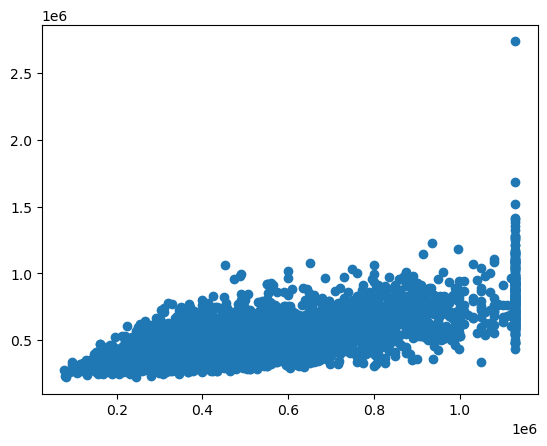

In [204]:
plt.scatter(y_test,predicted_values)

<Axes: xlabel='Sale_Price', ylabel='Density'>

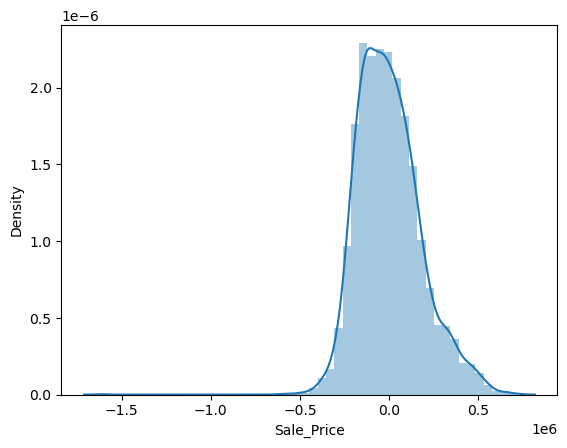

In [213]:
sns.distplot((y_test-predicted_values),bins=50)

In [216]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,predicted_values)
mse

32044639657.40293

In [218]:
r2 = r2_score(y_test,predicted_values)
r2

0.4928723619779932